In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#ex1
normalDistribution = {
    "default":np.random.normal(size=100000),
    "mean5_var1":np.random.normal(loc=5,scale=1,size=100000),
    "mean1_var5":np.random.normal(loc=1,scale=5,size=100000)
}

print(normalDistribution)

df = pd.DataFrame(data=normalDistribution)

{'default': array([-0.59341187,  1.47576421,  0.09575835, ...,  0.39021592,
        0.17247113, -0.58547933]), 'mean5_var1': array([3.31544483, 3.75031067, 4.22216529, ..., 5.11555398, 6.63169269,
       3.87331361]), 'mean1_var5': array([  1.83829894,  -2.27033705,  -4.55728214, ...,  10.29756202,
       -14.56049352,  -1.35789314])}


In [3]:
dfmelt = pd.melt(df,var_name='parameters',value_name='Value')
#print(dfmelt)

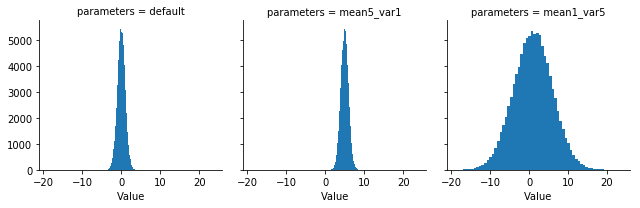

In [4]:
g = sns.FacetGrid(dfmelt,col="parameters",sharex=True)
g.map(plt.hist,'Value',cumulative=False,bins=64)

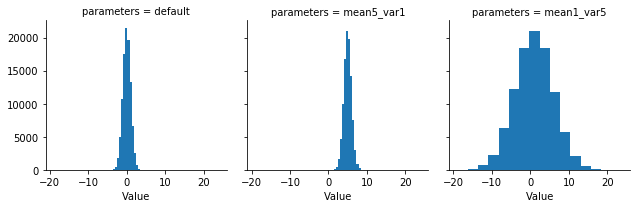

In [5]:
g = sns.FacetGrid(dfmelt,col="parameters",sharex=True)
g.map(plt.hist,'Value',cumulative=False,bins=16)

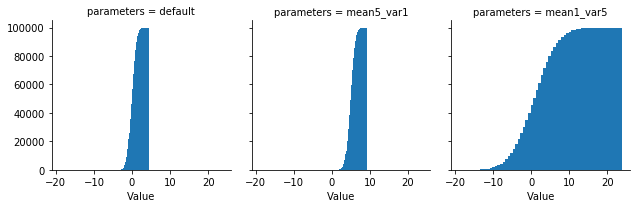

In [6]:
g = sns.FacetGrid(dfmelt,col="parameters",sharex=True)
g.map(plt.hist,'Value',cumulative=True,bins=64)

In [7]:
#ex2
from scipy.special import logit, expit
expit_df = expit(df)

expit_dfmelt = pd.melt(expit_df,var_name='parameters',value_name='Value')
print(dfmelt)

        parameters      Value
0          default  -0.593412
1          default   1.475764
2          default   0.095758
3          default   0.121724
4          default   0.124511
...            ...        ...
299995  mean1_var5   0.712083
299996  mean1_var5  -4.961697
299997  mean1_var5  10.297562
299998  mean1_var5 -14.560494
299999  mean1_var5  -1.357893

[300000 rows x 2 columns]


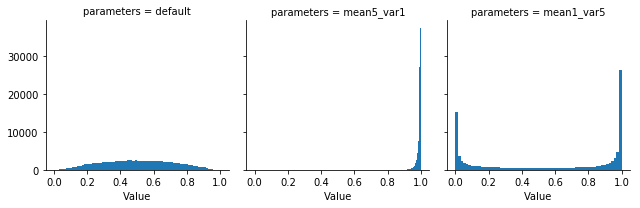

In [8]:
g = sns.FacetGrid(expit_dfmelt,col="parameters",sharex=True)
g.map(plt.hist,'Value',cumulative=False,bins=64)

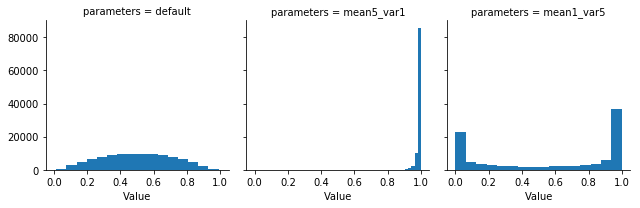

In [9]:
g = sns.FacetGrid(expit_dfmelt,col="parameters",sharex=True)
g.map(plt.hist,'Value',cumulative=False,bins=16)

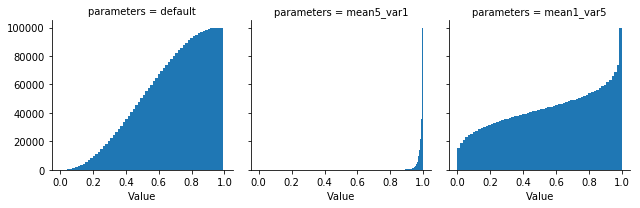

In [10]:
g = sns.FacetGrid(expit_dfmelt,col="parameters",sharex=True)
g.map(plt.hist,'Value',cumulative=True,bins=64)

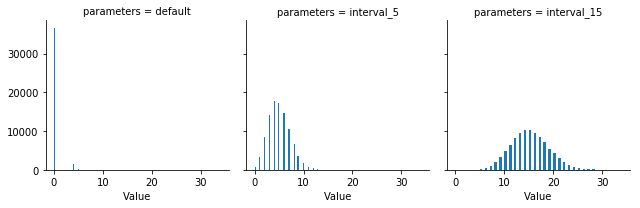

In [11]:
#ex3
poissonDistribution={
    "default":np.random.poisson(size=100000),
    "interval_5":np.random.poisson(lam=5,size=100000),
    "interval_15":np.random.poisson(lam=15,size=100000),
}

dfPoisson = pd.DataFrame(data=poissonDistribution)

dfPoissonmelt = pd.melt(dfPoisson,var_name='parameters',value_name='Value')


g = sns.FacetGrid(dfPoissonmelt,col="parameters",sharex=True)
g.map(plt.hist,'Value',cumulative=False,bins=64)

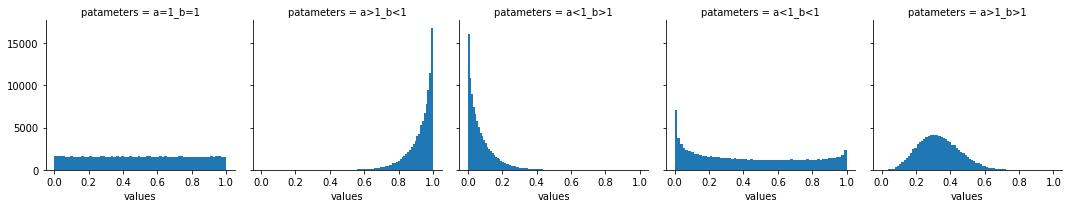

In [24]:
#ex4
betaDistribution={
    "a=1_b=1":np.random.beta(a=1,b=1,size=100000),
    "a>1_b<1":np.random.beta(a=10,b=0.8,size=100000),
    "a<1_b>1":np.random.beta(a=0.8,b=10,size=100000),
    "a<1_b<1":np.random.beta(a=0.6,b=0.8,size=100000),
    "a>1_b>1":np.random.beta(a=5,b=10,size=100000),
    
}

dfBeta = pd.DataFrame(data=betaDistribution)

dfBetamelt = pd.melt(dfBeta,var_name='patameters',value_name='values')

g = sns.FacetGrid(dfBetamelt,col='patameters',sharex=True)
g.map(plt.hist,'values',cumulative=False,bins=64)



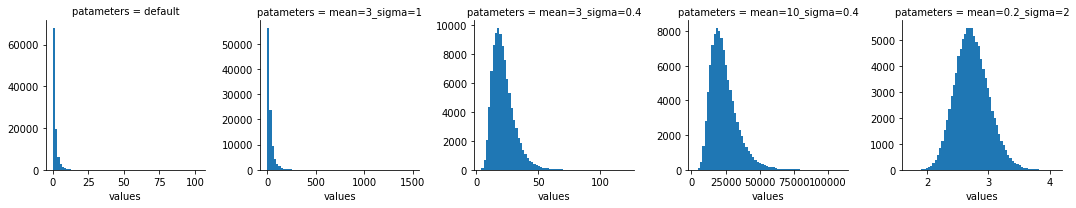

In [41]:
#ex5
logNormalDistribution={
    "default":np.random.lognormal(size=100000),
    "mean=3_sigma=1":np.random.lognormal(mean=3,sigma=1,size=100000),
    "mean=3_sigma=0.4":np.random.lognormal(mean=3,sigma=0.4,size=100000),
    "mean=10_sigma=0.4":np.random.lognormal(mean=10,sigma=0.4,size=100000),
    "mean=1_sigma=0.1":np.random.lognormal(mean=1,sigma=0.1,size=100000),
    
}

dflogNormal = pd.DataFrame(data=logNormalDistribution)

dflogNormalmelt = pd.melt(dflogNormal,var_name='patameters',value_name='values')

g = sns.FacetGrid(dflogNormalmelt,col='patameters',sharex=False,sharey=False)
g.map(plt.hist,'values',cumulative=False,bins=64)